## Sparks Foundation Task#2

#### Prediction using Unsupervised ML.
The task is to find out the optimum number of clusters from iris dataset and show them visually.
##### Author : Abdul Moiz Asif

#### Data Science and Business Analytics Intern May'21 

#### Loading our dataset

First of all we will be loading our iris dataset from sklearn datasets and converting it into pandas dataframe.Then printing the first 5 columns

In [26]:
import pandas as pd
from sklearn import datasets
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Initializing X which is features

In [39]:
X= df.iloc[:, [0,1,2,3]].values

### Determining the value of clusters

We will find the value of k by elbow method. In this method we test number of clusters from 1 to any number and then plot a graph of error and number of clusters. We can find the number of cluster from graph where the elbow is forming.


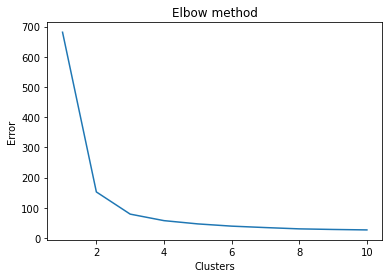

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
err=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i).fit(X)
    kmeans.fit(X)
    err.append(kmeans.inertia_)
plt.plot(range(1,11),err)
plt.title('Elbow method')
plt.xlabel('Clusters')
plt.ylabel('Error')
plt.show()


We can see in graph that the elbow is formed at the cluster=3. So k=3 is the optima number of clusters. Now lets visualize the clusters.
#### Implementing k-means clustering
We are going to implement k-means custering with k=3.

In [50]:
kmeans3=KMeans(n_clusters=3)
ykmeans3=kmeans3.fit_predict(X)
ykmeans3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [34]:
kmeans3.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

### Visualizing the clusters

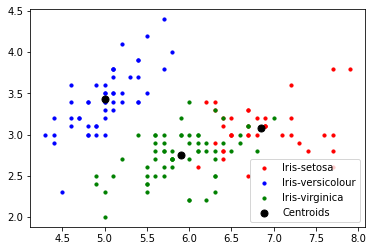

In [47]:
plt.scatter(X[ykmeans3 == 0, 0], X[ykmeans3 == 0, 1], 
            s = 10, c = 'red', label = 'Iris-setosa')
plt.scatter(X[ykmeans3 == 1, 0], X[ykmeans3 == 1, 1], 
            s = 10, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[ykmeans3 == 2, 0], X[ykmeans3 == 2, 1],
            s = 10, c = 'green', label = 'Iris-virginica')

#plt.scatter(X[:,0],X[:,1],c=ykmeans3,cmap='rainbow')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:,1], 
            s = 49, c = 'black', label = 'Centroids')
plt.legend()